In [1]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import xlsxwriter
import pylab as py

In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Times"
})

# Non perturbative parameters plots from different Generations

In [3]:
Data = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/CLAS12_variables.csv')
Data.keys()

Index(['Unnamed: 0', 'M_ki', 'M_kf', 'delta_k_t', 'ki_t', 'xi', 'zeta'], dtype='object')

In [4]:
print('Number of rows = ', len( Data['M_ki']))

Number of rows =  100001


In [5]:
Data_Random = pd.read_csv('/Users/tetiana/Documents/Affinity/Affinity_random_values/data/Non_pert_Parameters_same_size.csv')
Data_Random.keys()

Index(['Unnamed: 0', 'xi', 'zeta', 'delta_k_t', 'M_kf', 'k_iT', 'M_ki'], dtype='object')

In [6]:
print('Number of rows = ', len(Data_Random['M_ki']))

Number of rows =  100000


In [7]:
Data_Old = pd.read_csv('/Users/tetiana/Documents/sidisregions/data/Non_pert_Parameters_copy.csv')
Data_Old.keys()

Index(['Unnamed: 0', 'xi', 'zeta', 'k_iT', 'delta_k_t', 'M_kf', 'M_ki'], dtype='object')

In [8]:
print('Number of rows = ', len(Data_Old['M_ki']))

Number of rows =  10000


In [9]:
Data_Old_same_size = pd.read_csv('/Users/tetiana/Documents/sidisregions/data/Non_pert_Parameters_same_size.csv')
Data_Old_same_size.keys()

Index(['Unnamed: 0', 'xi', 'zeta', 'k_iT', 'delta_k_t', 'M_kf', 'M_ki'], dtype='object')

In [10]:
print('Number of rows = ', len(Data_Old_same_size['M_ki']))

Number of rows =  100000


## ____________________________________________________________________________________

## TEST

(array([2.689e+03, 2.597e+03, 2.707e+03, 2.640e+03, 2.626e+03, 2.693e+03,
        2.706e+03, 2.667e+03, 2.568e+03, 2.677e+03, 2.616e+03, 2.624e+03,
        2.687e+03, 2.677e+03, 2.606e+03, 2.546e+03, 2.523e+03, 2.507e+03,
        2.551e+03, 2.423e+03, 2.360e+03, 2.309e+03, 2.333e+03, 2.252e+03,
        2.238e+03, 2.099e+03, 2.095e+03, 1.985e+03, 1.921e+03, 1.879e+03,
        1.850e+03, 1.767e+03, 1.672e+03, 1.603e+03, 1.525e+03, 1.471e+03,
        1.341e+03, 1.287e+03, 1.222e+03, 1.126e+03, 9.930e+02, 9.780e+02,
        8.820e+02, 7.940e+02, 7.440e+02, 7.590e+02, 6.280e+02, 5.840e+02,
        5.480e+02, 4.630e+02, 4.480e+02, 3.750e+02, 3.450e+02, 3.350e+02,
        3.190e+02, 2.650e+02, 2.510e+02, 1.920e+02, 1.940e+02, 1.460e+02,
        1.590e+02, 1.100e+02, 1.260e+02, 1.000e+02, 8.600e+01, 7.600e+01,
        6.500e+01, 5.700e+01, 5.000e+01, 3.700e+01, 3.900e+01, 2.800e+01,
        2.900e+01, 1.400e+01, 2.000e+01, 1.500e+01, 1.600e+01, 1.600e+01,
        6.000e+00, 9.000e+00, 2.000e+0

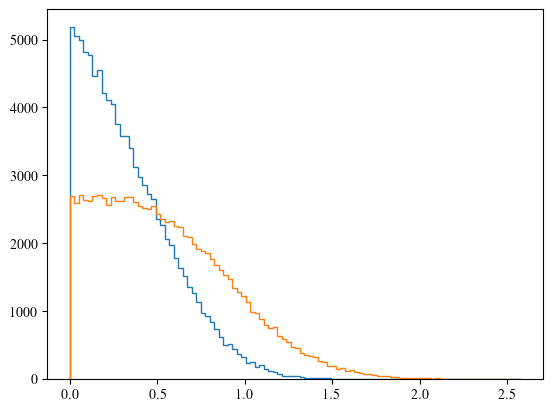

In [172]:
a = Data_Random['M_ki']                   # A uniform distribution
b = Data_Old_same_size['M_ki']          # A normal distribution 
bins = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges
plt.hist(a, bins, histtype='step')
plt.hist(b, bins, histtype='step')

## ____________________________________________________________________________________

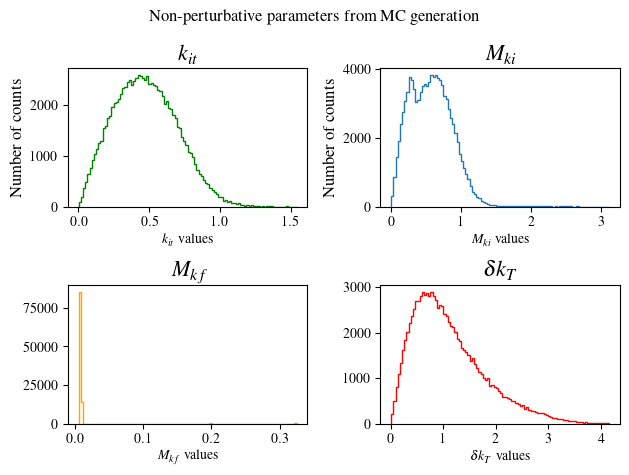

In [226]:
fig, axs = plt.subplots(2, 2)
# fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('Non-perturbative parameters from MC generation')

axs[0, 0].hist(Data['ki_t'], bins = 100, color = 'green', histtype='step', density=False)
axs[0, 0].set_title("$k_{it}$", fontsize=16)
axs[0, 0].set_xlabel('$k_{it}$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)

axs[0, 1].hist(Data['M_ki'], bins = 100, histtype='step', density=False)
axs[0, 1].set_title("$M_{ki}$", fontsize=16)
axs[0, 1].set_xlabel('$M_{ki}$ values')
axs[0, 1].set_ylabel('Number of counts', fontsize=12)

axs[1, 0].hist(Data['M_kf'], bins = 100, color = 'orange', histtype='step', density=False)
axs[1, 0].set_title("$M_{kf}$", fontsize=16)
axs[1, 0].set_xlabel('$M_{kf}$ values')

axs[1, 1].hist(Data['delta_k_t'], bins = 100, color = 'red', histtype='step', density=False)
axs[1, 1].set_title("$\delta k_T$", fontsize=16)
axs[1, 1].set_xlabel('$\delta k_T$ values')

# for ax in axs.flat:
#     ax.set(ylabel='Number of counts')
    
fig.tight_layout()

py.savefig('./Figs/Non_pert_MC.pdf') 

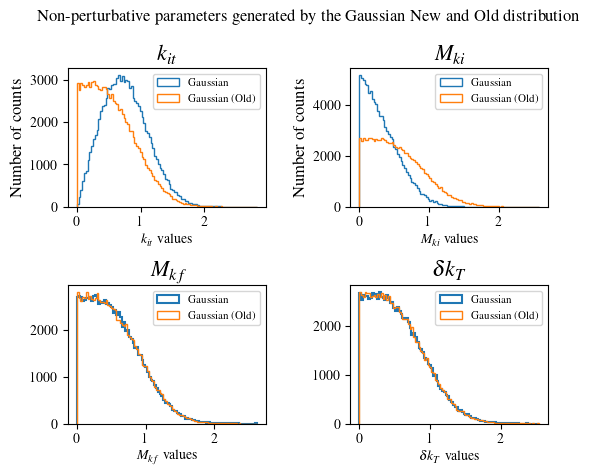

In [207]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)


plt.rcParams['text.usetex'] = True
fig.suptitle('Non-perturbative parameters generated by the Gaussian New and Old distribution')

a = Data_Random['k_iT']                   # A uniform distribution
b = Data_Old_same_size['k_iT']          # A normal distribution 
bins = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges

axs[0, 0].hist(Data_Random['k_iT'], bins, label=['Gaussian'], histtype='step', density=False)
axs[0, 0].hist(Data_Old_same_size['k_iT'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[0, 0].set_title("$k_{it}$", fontsize=16)
axs[0, 0].set_xlabel('$k_{it}$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)


a = Data_Random['M_ki']                   # A uniform distribution
b = Data_Old_same_size['M_ki']          # A normal distribution 
bins = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges

axs[0, 1].hist(Data_Random['M_ki'], bins, label=['Gaussian'], histtype='step', density=False)
axs[0, 1].hist(Data_Old_same_size['M_ki'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[0, 1].set_title("$M_{ki}$", fontsize=16)
axs[0, 1].set_xlabel('$M_{ki}$ values')
axs[0, 1].set_ylabel('Number of counts', fontsize=12)
axs[0, 1].legend(fontsize=8)


a = Data_Random['M_kf']                   # A uniform distribution
b = Data_Old_same_size['M_kf']          # A normal distribution 
bins = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges

axs[1, 0].hist(Data_Random['M_kf'], bins, label=['Gaussian'], histtype='step', linewidth=1.5,  density=False)
axs[1, 0].hist(Data_Old_same_size['M_kf'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[1, 0].set_title("$M_{kf}$", fontsize=16)
axs[1, 0].set_xlabel('$M_{kf}$ values')
axs[1, 0].legend(fontsize=8)


a = Data_Random['delta_k_t']                   # A uniform distribution
b = Data_Old_same_size['delta_k_t']          # A normal distribution 
bins = np.histogram(np.hstack((a,b)), bins=100)[1] # Get the bin edges

axs[1, 1].hist(Data_Random['delta_k_t'], bins, label=['Gaussian'], histtype='step', linewidth=1.5, density=False)
axs[1, 1].hist(Data_Old_same_size['delta_k_t'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[1, 1].set_title("$\delta k_T$", fontsize=16)
axs[1, 1].set_xlabel('$\delta k_T$ values')
axs[1, 1].legend(fontsize=8)

# for ax in axs.flat:
#     ax.set(ylabel='Number of counts')

# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('delta_kT')    --- plot with the dependence between 2 parameters

fig.tight_layout()

py.savefig('./Figs/Non_pert_Random.pdf') 

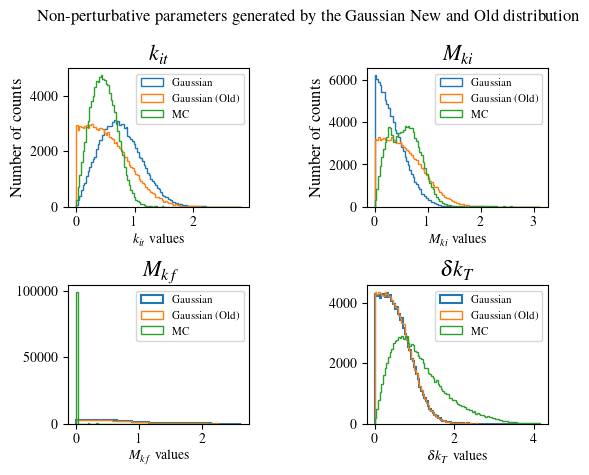

In [315]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)


plt.rcParams['text.usetex'] = True
fig.suptitle('Non-perturbative parameters generated by the Gaussian New and Old distribution')

a = Data_Random['k_iT']                   # A uniform distribution
b = Data_Old_same_size['k_iT']          # A normal distribution
c = Data['ki_t']
bins = np.histogram(np.hstack((a,b,c)), bins=100)[1] # Get the bin edges

axs[0, 0].hist(Data_Random['k_iT'], bins, label=['Gaussian'], histtype='step', density=False)
axs[0, 0].hist(Data_Old_same_size['k_iT'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[0, 0].hist(Data['ki_t'], bins, label=['MC'], histtype='step', density=False)
axs[0, 0].set_title("$k_{it}$", fontsize=16)
axs[0, 0].set_xlabel('$k_{it}$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)


a = Data_Random['M_ki']                   # A uniform distribution
b = Data_Old_same_size['M_ki']          # A normal distribution 
c = Data['M_ki'] 
bins = np.histogram(np.hstack((a,b,c)), bins=100)[1] # Get the bin edges

axs[0, 1].hist(Data_Random['M_ki'], bins, label=['Gaussian'], histtype='step', density=False)
axs[0, 1].hist(Data_Old_same_size['M_ki'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[0, 1].hist(Data['M_ki'], bins, label=['MC'], histtype='step', density=False)
axs[0, 1].set_title("$M_{ki}$", fontsize=16)
axs[0, 1].set_xlabel('$M_{ki}$ values')
axs[0, 1].set_ylabel('Number of counts', fontsize=12)
axs[0, 1].legend(fontsize=8)


a = Data_Random['M_kf']                   # A uniform distribution
b = Data_Old_same_size['M_kf']          # A normal distribution 
c = Data['M_kf']
bins = np.histogram(np.hstack((a,b,c)), bins=100)[1] # Get the bin edges

axs[1, 0].hist(Data_Random['M_kf'], bins, label=['Gaussian'], histtype='step', linewidth=1.5,  density=False)
axs[1, 0].hist(Data_Old_same_size['M_kf'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[1, 0].hist(Data['M_kf'], bins, label=['MC'], histtype='step', density=False)
axs[1, 0].set_title("$M_{kf}$", fontsize=16)
axs[1, 0].set_xlabel('$M_{kf}$ values')
axs[1, 0].legend(fontsize=8)


a = Data_Random['delta_k_t']                   # A uniform distribution
b = Data_Old_same_size['delta_k_t']          # A normal distribution 
c = Data['delta_k_t']
bins = np.histogram(np.hstack((a,b,c)), bins=100)[1] # Get the bin edges

axs[1, 1].hist(Data_Random['delta_k_t'], bins, label=['Gaussian'], histtype='step', linewidth=1.5, density=False)
axs[1, 1].hist(Data_Old_same_size['delta_k_t'], bins, label=['Gaussian (Old)'], histtype='step', density=False)
axs[1, 1].hist(Data['delta_k_t'], bins, label=['MC'], histtype='step', density=False)
axs[1, 1].set_title("$\delta k_T$", fontsize=16)
axs[1, 1].set_xlabel('$\delta k_T$ values')
axs[1, 1].legend(fontsize=8)

# for ax in axs.flat:
#     ax.set(ylabel='Number of counts')

# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('delta_kT')    --- plot with the dependence between 2 parameters

fig.tight_layout()

py.savefig('./Figs/Non_pert_Comp.pdf') 

## ------------- Comparing Non-perturbative values With/Without filter + MC -------------

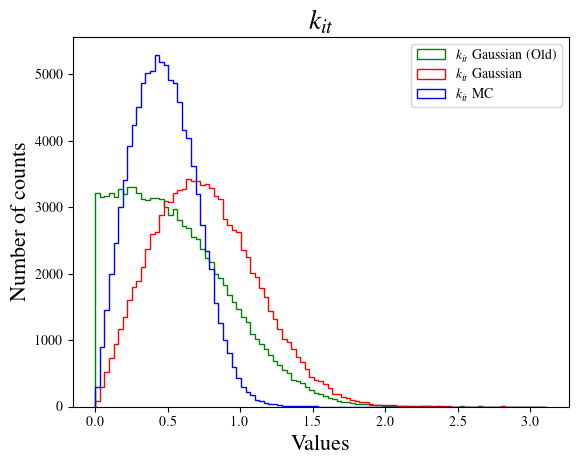

In [221]:
edges = np.linspace(Data['M_ki'].min(), Data['M_ki'].max(), 100)

# Creating a stacked histogram
plt.hist(Data_Old_same_size['k_iT'], bins = edges, label=['$k_{it}$ Gaussian (Old)'], color='green', histtype='step', stacked=True, density=False)
plt.hist(Data_Random['k_iT'], bins = edges, label=['$k_{it}$ Gaussian'], color='red', histtype='step', stacked=True, density=False)
plt.hist(Data['ki_t'], bins = edges, label=['$k_{it}$ MC'], color='blue', histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$k_{it}$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/k_iT_val_Compar.pdf')

# Display the plot
plt.show()

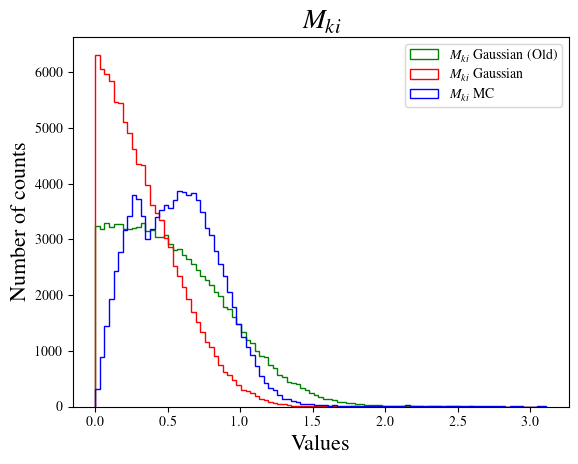

In [215]:
edges = np.linspace(Data['M_ki'].min(), Data['M_ki'].max(), 100)

# Creating a stacked histogram
plt.hist(Data_Old_same_size['M_ki'], bins = edges, label=['$M_{ki}$ Gaussian (Old)'], color='green', histtype='step', stacked=True, density=False)
plt.hist(Data_Random['M_ki'], bins = edges, label=['$M_{ki}$ Gaussian'], color='red', histtype='step', stacked=True, density=False)
plt.hist(Data['M_ki'], bins = edges, label=['$M_{ki}$ MC'], color='blue', histtype='step', stacked=True, density=False)

# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$M_{ki}$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/M_ki_val_Compar.pdf')

# Display the plot
plt.show()

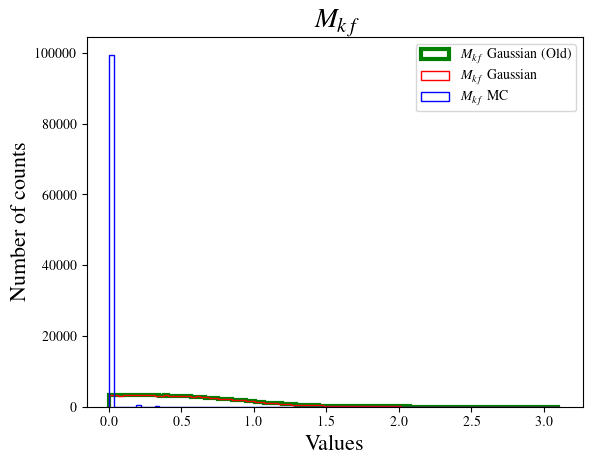

In [217]:
edges = np.linspace(Data['M_ki'].min(), Data['M_ki'].max(), 100)

# Creating a stacked histogram
plt.hist(Data_Old_same_size['M_kf'], bins = edges, label=['$M_{kf}$ Gaussian (Old)'], color='green', linewidth=3, histtype='step', stacked=True, density=False)
plt.hist(Data_Random['M_kf'], bins = edges, label=['$M_{kf}$ Gaussian'], color='red', histtype='step', stacked=True, density=False)
plt.hist(Data['M_kf'], bins = edges, label=['$M_{kf}$ MC'], color='blue', histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$M_{kf}$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/M_kf_val_Compar.pdf')

# Display the plot
plt.show()

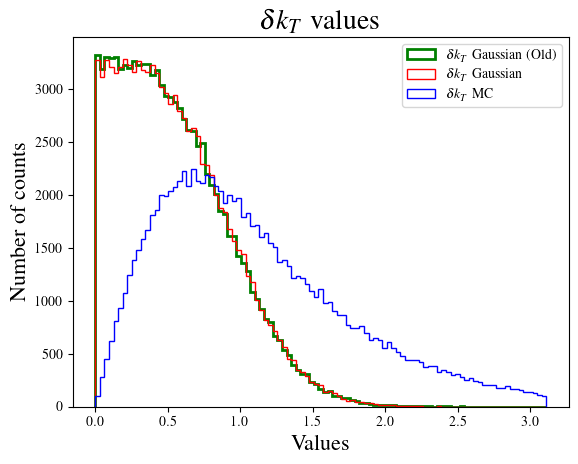

In [219]:
edges = np.linspace(Data['M_ki'].min(), Data['M_ki'].max(), 100)

# Creating a stacked histogram
plt.hist(Data_Old_same_size['delta_k_t'], bins = edges, label=['$\delta k_T$ Gaussian (Old)'], color='green', linewidth=2, histtype='step', stacked=True, density=False)
plt.hist(Data_Random['delta_k_t'], bins = edges, label=['$\delta k_T$ Gaussian'], color='red', histtype='step', stacked=True, density=False)
plt.hist(Data['delta_k_t'], bins = edges, label=['$\delta k_T$ MC'], color='blue', histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$\delta k_T$ values', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/delta_k_t_val_Compar.pdf')

# Display the plot
plt.show()

# ---------------- R values plots from different Generations -----------------

In [24]:
Data_R_MC = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/data/jlab22_pi0affinity0.3.xlsx')
Data_R_MC.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT',
       'avQ2', 'avx', 'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity',
       'bin_c_Q2', 'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z',
       'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

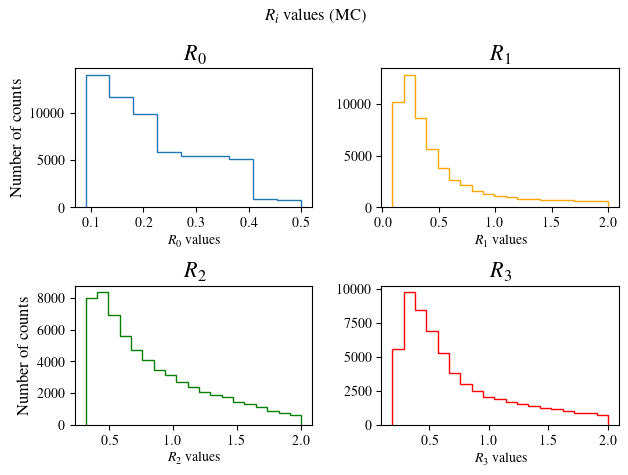

In [307]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (MC)')

edges1 = np.linspace(Data_R_MC['R0'].min(), 0.5, 10)

axs[0, 0].hist(Data_R_MC['R0'], bins = edges1, histtype='step', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)

edges2 = np.linspace(Data_R_MC['R2'].min(), 2, 20)

axs[1, 0].hist(Data_R_MC['R2'], bins = edges2, color = 'green', histtype='step', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)

edges3 = np.linspace(Data_R_MC['R1'].min(), 2, 20)

axs[0, 1].hist(Data_R_MC['R1'], bins = edges3, color = 'orange', histtype='step', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')

edges4 = np.linspace(Data_R_MC['R3'].min(), 2, 20)

axs[1, 1].hist(Data_R_MC['R3'], bins = edges4, color = 'red', histtype='step', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')

# for ax in axs.flat:
#     ax.set(ylabel='Number of counts')

# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('delta_kT')    --- plot with the dependence between 2 parameters
    
fig.tight_layout()

py.savefig('./Figs/R_val_MC.pdf')

In [26]:
Data_R_Random = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_random_values/data/jlab22_pi0affinity_size0.3.xlsx')
Data_R_Random.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT',
       'avQ2', 'avx', 'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity',
       'bin_c_Q2', 'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z',
       'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

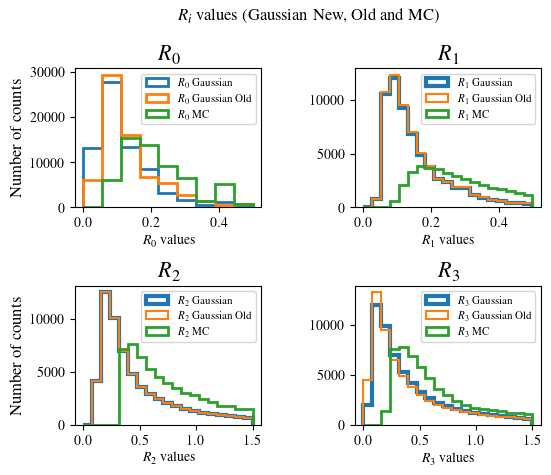

In [353]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New, Old and MC)')

edges1 = np.linspace(0, 0.5, 10)

axs[0, 0].hist(Data_R_Random['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_R_Random_Old['R0'], bins = edges1, label='$R_0$ Gaussian Old', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_R_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges2 = np.linspace(0, 1.5, 20)

axs[1, 0].hist(Data_R_Random['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 0].hist(Data_R_Random_Old['R2'], bins = edges2, label='$R_2$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[1, 0].hist(Data_R_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges3 = np.linspace(0, 0.5, 20)

axs[0, 1].hist(Data_R_Random['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=3, histtype='step', density=False)
axs[0, 1].hist(Data_R_Random_Old['R1'], bins = edges3, label='$R_1$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[0, 1].hist(Data_R_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges4 = np.linspace(0, 1.5, 20)

axs[1, 1].hist(Data_R_Random['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 1].hist(Data_R_Random_Old['R3'], bins = edges4, label='$R_3$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[1, 1].hist(Data_R_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_Comp.pdf') 

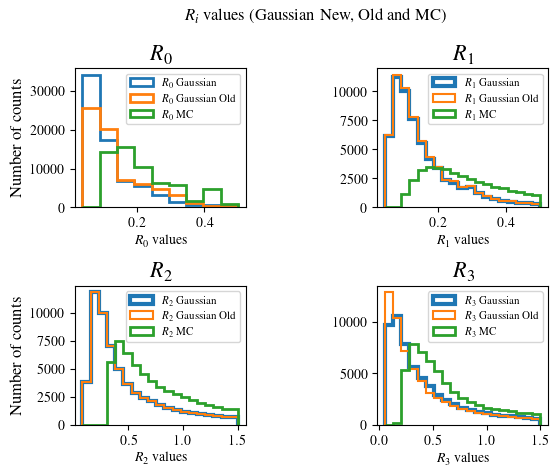

In [338]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New, Old and MC)')

edges1 = np.linspace(Data_R_Random['R0'].min(), 0.5, 10)

axs[0, 0].hist(Data_R_Random['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_R_Random_Old['R0'], bins = edges1, label='$R_0$ Gaussian Old', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_R_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges2 = np.linspace(Data_R_Random['R2'].min(), 1.5, 20)

axs[1, 0].hist(Data_R_Random['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 0].hist(Data_R_Random_Old['R2'], bins = edges2, label='$R_2$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[1, 0].hist(Data_R_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges3 = np.linspace(Data_R_Random['R1'].min(), 0.5, 20)

axs[0, 1].hist(Data_R_Random['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=3, histtype='step', density=False)
axs[0, 1].hist(Data_R_Random_Old['R1'], bins = edges3, label='$R_1$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[0, 1].hist(Data_R_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges4 = np.linspace(Data_R_Random['R3'].min(), 1.5, 20)

axs[1, 1].hist(Data_R_Random['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 1].hist(Data_R_Random_Old['R3'], bins = edges4, label='$R_3$ Gaussian Old', linewidth=1.5, histtype='step', density=False)
axs[1, 1].hist(Data_R_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_val_Random.pdf')

In [28]:
Data_R_Random_Old = pd.read_excel('/Users/tetiana/Documents/sidisregions/data/jlab22_pi0affinity0.3_size_100k.xlsx')
Data_R_Random_Old.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT',
       'avQ2', 'avx', 'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity',
       'bin_c_Q2', 'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z',
       'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

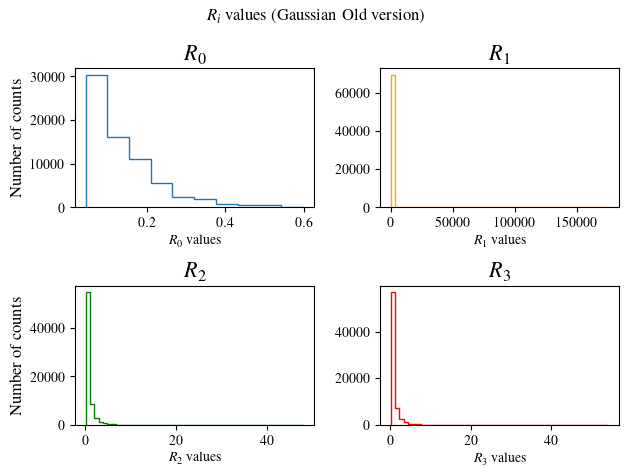

In [29]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian Old version)')

axs[0, 0].hist(Data_R_Random_Old['R0'], bins = 10, histtype='step', density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)

axs[1, 0].hist(Data_R_Random_Old['R2'], bins = 50, color = 'green', histtype='step', density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)

axs[0, 1].hist(Data_R_Random_Old['R1'], bins = 50, color = 'orange', histtype='step', density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')

axs[1, 1].hist(Data_R_Random_Old['R3'], bins = 50, color = 'red', histtype='step', density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')

fig.tight_layout()

py.savefig('./Figs/R_val_Random_Old.pdf')

## ------------- Comparing Non-perturbative values With/Without filter + MC -------------

## $R_0$ comparing

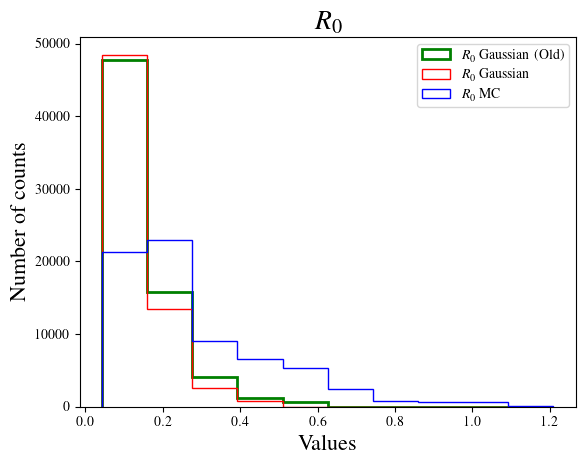

In [270]:
a = Data_R_Random_Old['R0']                   # A uniform distribution
# b = Data_R_Random['R0']          # A normal distribution 
c = Data_R_MC['R0']
bins = np.histogram(np.hstack((a,c)), bins=10)[1] # Get the bin edges

# Creating a stacked histogram
plt.hist(Data_R_Random_Old['R0'], bins, label=['$R_0$ Gaussian (Old)'], color='green', linewidth=2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_Random['R0'], bins, label=['$R_0$ Gaussian'], color='red', histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R0'], bins, label=['$R_0$ MC'], color='blue', histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_0$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/R0_val_Comp.pdf')

# Display the plot
plt.show()

## $R_1$ comparing

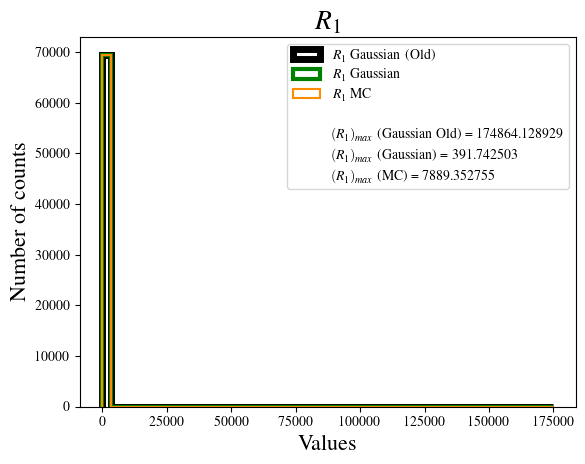

In [282]:
R = Data_R_Random_Old['R1'].max()
R1 = Data_R_Random['R1'].max()
R2 = Data_R_MC['R1'].max()


a = Data_R_Random_Old['R1']                   # A uniform distribution
b = Data_R_Random['R1']          # A normal distribution 
c = Data_R_MC['R1']
edges = np.histogram(np.hstack((a,b,c)), bins=50)[1] # Get the bin edges

# Creating a stacked histogram
plt.hist(Data_R_Random_Old['R1'], bins=edges, label=['$R_1$ Gaussian (Old)'], color='black', linewidth=5, histtype='step', stacked=True, density=False)
plt.hist(Data_R_Random['R1'], bins=edges, label=['$R_1$ Gaussian'], color='green', linewidth=3, histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R1'], bins=edges, label=['$R_1$ MC'], color='darkorange', linewidth=1.5, histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_1$', fontsize=20)
 
# Adding legend
string1 = '$(R_1)_{max}$ (Gaussian Old) = %f' %R
string2 = '$(R_1)_{max}$ (Gaussian) = %f' %R1
string3 = '$(R_1)_{max}$ (MC) = %f' %R2
plt.plot([], [], ' ', label=' ')
plt.plot([], [], ' ', label=string1)
plt.plot([], [], ' ', label=string2)
plt.plot([], [], ' ', label=string3)
plt.legend()

py.savefig('./Figs/R1_val_Comp.pdf')

# Display the plot
plt.show()

## $R_2$ comparing

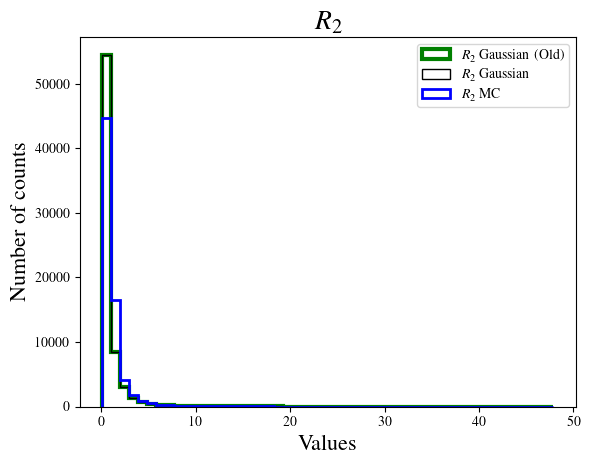

In [284]:
a = Data_R_Random_Old['R2']                   # A uniform distribution
b = Data_R_Random['R2']          # A normal distribution 
c = Data_R_MC['R2']
edges = np.histogram(np.hstack((a,b,c)), bins=50)[1] # Get the bin edges

# Creating a stacked histogram
plt.hist(Data_R_Random_Old['R2'], bins = edges, label=['$R_2$ Gaussian (Old)'], color='green', linewidth = 3, histtype='step', stacked=True, density=False)
plt.hist(Data_R_Random['R2'], bins = edges, label=['$R_2$ Gaussian'], color='black', histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R2'], bins = edges, label=['$R_2$ MC'], color='blue', linewidth = 2, histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
# plt.xlim(-1, Data_R_Random['R2'].max())
 
# Adding legend
plt.legend()

py.savefig('./Figs/R2_val_Comp.pdf')

plt.show()

## $R_3$ comparing

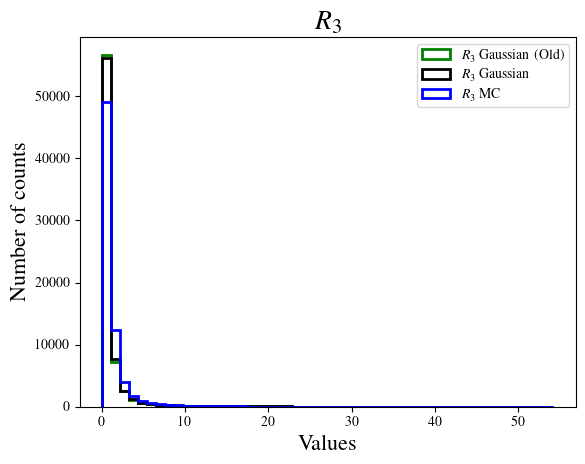

In [285]:
a = Data_R_Random_Old['R3']                   # A uniform distribution
b = Data_R_Random['R3']          # A normal distribution 
c = Data_R_MC['R3']
edges = np.histogram(np.hstack((a,b,c)), bins=50)[1] # Get the bin edges

# Creating a stacked histogram
plt.hist(Data_R_Random_Old['R3'], bins = edges, label=['$R_3$ Gaussian (Old)'], color='green', linewidth = 2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_Random['R3'], bins = edges, label=['$R_3$ Gaussian'], color='black', linewidth=2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R3'], bins = edges, label=['$R_3$ MC'], color='blue', linewidth = 2, histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_3$', fontsize=20)
# plt.xlim(-1, Data_R_MC['R3'].max())
 
# Adding legend
plt.legend()

py.savefig('./Figs/R3_val_Comp.pdf')

plt.show()

## ------------- Comparing Non-perturbative values With filter / MC -------------

## $R_0$ comparing

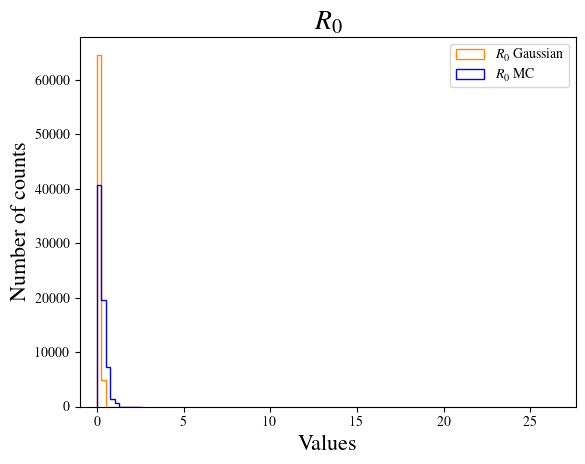

In [157]:
# Creating a stacked histogram
plt.hist(Data_R_Random['R0'], bins, label=['$R_0$ Gaussian'], color='darkorange', histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R0'], bins, label=['$R_0$ MC'], color='blue', histtype='step', stacked=True, density=False)

 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_0$', fontsize=20)
# plt.xlim(-1, Data_R_MC['R3'].max())
 
# Adding legend
plt.legend()

py.savefig('./Figs/R0_MC_Random.pdf')

# Display the plot
plt.show()

## $R_1$ comparing

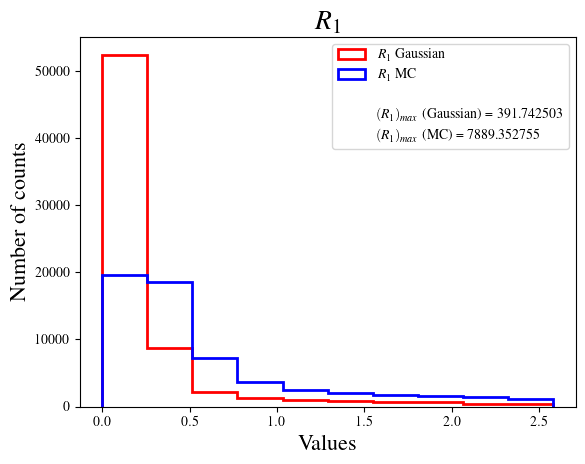

In [146]:
R = Data_R_Random['R1'].max()
R1 = Data_R_MC['R1'].max()

# Creating a stacked histogram
plt.hist(Data_R_Random['R1'], bins, label=['$R_1$ Gaussian'], color='red', linewidth = 2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R1'], bins, label=['$R_1$ MC'], color='blue', linewidth = 2, histtype='step', stacked=True, density=False)

 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_1$', fontsize=20)
 
# Adding legend
string1 = '$(R_1)_{max}$ (Gaussian) = %f' %R
string2 = '$(R_1)_{max}$ (MC) = %f' %R1
plt.plot([], [], ' ', label=' ')
plt.plot([], [], ' ', label=string1)
plt.plot([], [], ' ', label=string2)
plt.legend()

py.savefig('./Figs/R1_MC_Random.pdf')

# Display the plot
plt.show()

## $R_2$ comparing

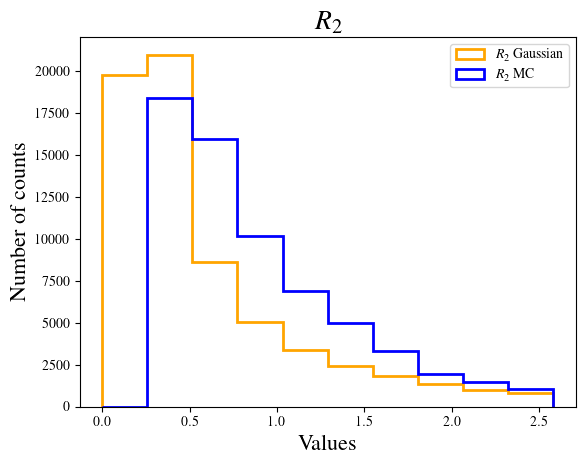

In [147]:
# Creating a stacked histogram
plt.hist(Data_R_Random['R2'], bins, label=['$R_2$ Gaussian'], color='orange', linewidth = 2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R2'], bins, label=['$R_2$ MC'], color='blue', linewidth = 2, histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_2$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/R2_MC_Random.pdf')

plt.show()

## $R_3$ comparing

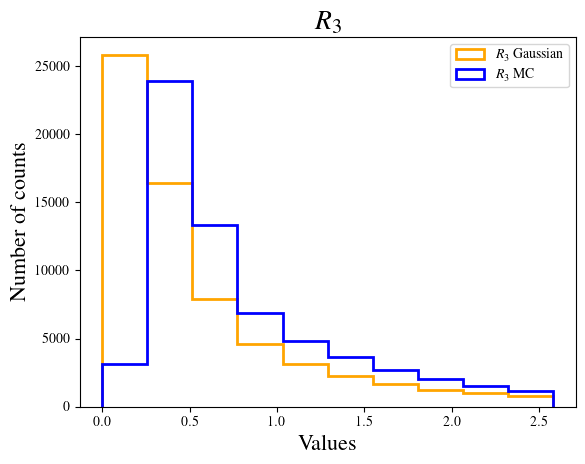

In [148]:
# Creating a stacked histogram
plt.hist(Data_R_Random['R3'], bins, label=['$R_3$ Gaussian'], color='orange', linewidth = 2, histtype='step', stacked=True, density=False)
plt.hist(Data_R_MC['R3'], bins, label=['$R_3$ MC'], color='blue', linewidth = 2, histtype='step', stacked=True, density=False)
 
# Adding labels and title
plt.xlabel('Values', fontsize=16)
plt.ylabel('Number of counts', fontsize=16)
plt.title('$R_3$', fontsize=20)
 
# Adding legend
plt.legend()

py.savefig('./Figs/R3_MC_Random.pdf')

plt.show()

# COMPARING 1K EVENTS (14.02.2025)

In [354]:
Data_MC = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_CLAS12_values/data/jlab22_pi0affinity_1k_events_0.3.xlsx')
Data_R_MC.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT',
       'avQ2', 'avx', 'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity',
       'bin_c_Q2', 'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z',
       'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

In [356]:
Data_Gaus = pd.read_excel('/Users/tetiana/Documents/Affinity/Affinity_random_values/data/jlab22_pi0affinity_1k_events0.3.xlsx')
Data_R_MC.keys()

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Bin', 'sec', 'nQ2', 'nx', 'nz', 'npT',
       'avQ2', 'avx', 'avz', 'avpT', 'avy', 'N_events', 'N_unp', 'N_helicity',
       'bin_c_Q2', 'bin_c_x', 'bin_c_z', 'bin_c_pT', 'Q2', 'pT', 'x', 'y', 'z',
       'target', 'hadron', 'partonicaff', 'currentaff', 'tmdaff', 'tmdnpaff',
       'collinearaff', 'collinearloworderaff', 'collinearhighorderaff',
       'matchaff', 'softaff', 'targetaff', 'unclassifiedaff', 'R0', 'R1',
       'R1p', 'R2', 'R3', 'R4', 'R5', 'qT', 'xN', 'zN', 'yp', 'yh', 'yhtarget',
       'yi', 'yf'],
      dtype='object')

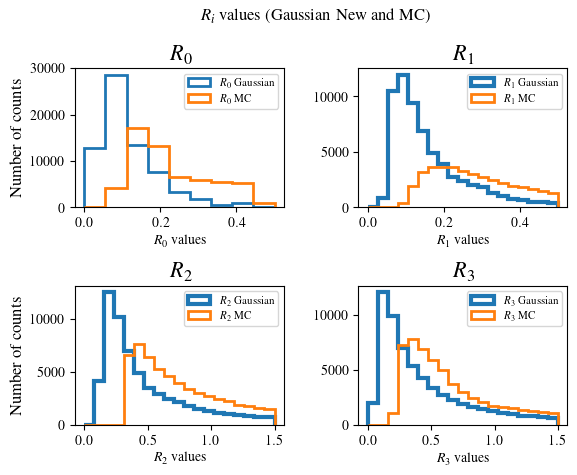

In [357]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (Gaussian New and MC)')

edges1 = np.linspace(0, 0.5, 10)

axs[0, 0].hist(Data_Gaus['R0'], bins = edges1, label='$R_0$ Gaussian', linewidth=2, histtype='step', density=False)
axs[0, 0].hist(Data_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges2 = np.linspace(0, 1.5, 20)

axs[1, 0].hist(Data_Gaus['R2'], bins = edges2, label='$R_2$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 0].hist(Data_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges3 = np.linspace(0, 0.5, 20)

axs[0, 1].hist(Data_Gaus['R1'], bins = edges3, label='$R_1$ Gaussian', linewidth=3, histtype='step', density=False)
axs[0, 1].hist(Data_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges4 = np.linspace(0, 1.5, 20)

axs[1, 1].hist(Data_Gaus['R3'], bins = edges4, label='$R_3$ Gaussian', linewidth=3, histtype='step', density=False)
axs[1, 1].hist(Data_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_val_1k_events.pdf')

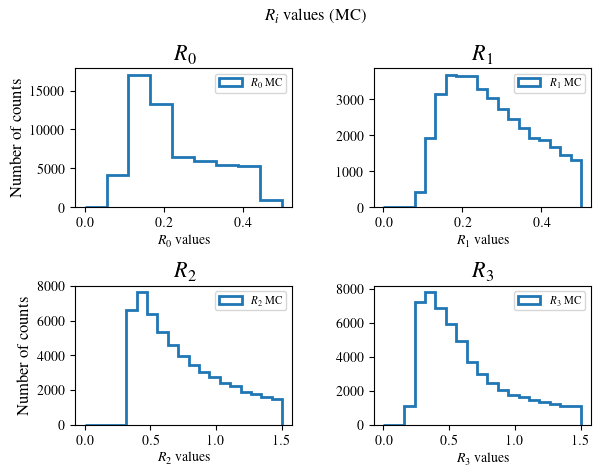

In [358]:
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(left=0.6, wspace=2)

plt.rcParams['text.usetex'] = True
fig.suptitle('$R_i$ values (MC)')

edges1 = np.linspace(0, 0.5, 10)

axs[0, 0].hist(Data_MC['R0'], bins = edges1, label=['$R_0$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 0].set_title("$R_0$", fontsize=16)
axs[0, 0].set_xlabel('$R_0$ values')
axs[0, 0].set_ylabel('Number of counts', fontsize=12)
axs[0, 0].legend(fontsize=8)

edges2 = np.linspace(0, 1.5, 20)

axs[1, 0].hist(Data_MC['R2'], bins = edges2, label=['$R_2$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 0].set_title("$R_2$", fontsize=16)
axs[1, 0].set_xlabel('$R_2$ values')
axs[1, 0].set_ylabel('Number of counts', fontsize=12)
axs[1, 0].legend(fontsize=8)

edges3 = np.linspace(0, 0.5, 20)

axs[0, 1].hist(Data_MC['R1'], bins = edges3, label=['$R_1$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[0, 1].set_title("$R_1$", fontsize=16)
axs[0, 1].set_xlabel('$R_1$ values')
axs[0, 1].legend(fontsize=8)

edges4 = np.linspace(0, 1.5, 20)

axs[1, 1].hist(Data_MC['R3'], bins = edges4, label=['$R_3$ MC'], linewidth=2, histtype='step', stacked=True, density=False)
axs[1, 1].set_title("$R_3$", fontsize=16)
axs[1, 1].set_xlabel('$R_3$ values')
axs[1, 1].legend(fontsize=8)

fig.tight_layout()

py.savefig('./Figs/R_val_1k_events_MC.pdf')